# Time series

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from datetime import datetime

The Python standard library includes data types for date and time data, as well as calendar-related functionality. The datetime, time, and calendar modules are the main places to start. The datetime.datetime type, or simply datetime, is widely used:

In [2]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
         datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = Series(np.random.randn(6), index=dates)
ts

2011-01-02    0.286021
2011-01-05   -0.068626
2011-01-07    1.637058
2011-01-08   -0.429685
2011-01-10    0.196298
2011-01-12    0.694819
dtype: float64

Internally, Pandas uses DatetimeIndex objects to index time series:

In [3]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

Like with any other Series, arithmetic operations are performed after alignment:

In [4]:
ts + ts[::2]

2011-01-02    0.572042
2011-01-05         NaN
2011-01-07    3.274116
2011-01-08         NaN
2011-01-10    0.392596
2011-01-12         NaN
dtype: float64

Scalar values in a time index are Timestamp objects:

In [5]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

A Timestamp can be used anywhere where a datetime object would be accepted. Additionally, it can store information about event frequencies and understands timezone conversions.

### Indexing, selection, subsetting

TimeSeries is a subclass of Series and thus behaves in the same way with regard to indexing and selecting data based on label:

In [6]:
stamp = ts.index[2]
ts[stamp]

1.6370578808040854

As a convenience, you can also pass a string that is interpretable as a date:

In [7]:
ts['1/10/2011']

0.196297776311064

In [8]:
ts['20110110']

0.196297776311064

For longer time series, a year or only a year and month can be passed to easily select slices of data:

In [9]:
longer_ts = Series(np.random.randn(1000),
                   index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01    1.022279
2000-01-02   -1.516122
2000-01-03    0.261204
2000-01-04   -0.208487
2000-01-05   -1.570309
2000-01-06    1.631885
2000-01-07   -0.965787
2000-01-08    0.489696
2000-01-09   -0.879250
2000-01-10   -0.327097
2000-01-11   -0.889037
2000-01-12   -0.305498
2000-01-13    0.012139
2000-01-14    1.175221
2000-01-15    0.885714
2000-01-16    1.514103
2000-01-17    0.499760
2000-01-18   -0.665818
2000-01-19    0.023838
2000-01-20   -0.391003
2000-01-21    1.559012
2000-01-22   -0.720631
2000-01-23   -0.622570
2000-01-24    0.413285
2000-01-25   -0.111949
2000-01-26   -1.308409
2000-01-27    0.992091
2000-01-28   -0.450040
2000-01-29   -2.913134
2000-01-30    1.190953
                ...   
2002-08-28   -1.349456
2002-08-29   -0.710127
2002-08-30    0.089077
2002-08-31   -0.404936
2002-09-01   -0.618820
2002-09-02    0.991350
2002-09-03   -2.027648
2002-09-04   -0.494244
2002-09-05    1.397415
2002-09-06    0.008103
2002-09-07   -0.927809
2002-09-08   -2.238107
2002-09-09 

In [10]:
longer_ts['2001']

2001-01-01    0.112057
2001-01-02    2.143149
2001-01-03   -0.102662
2001-01-04    2.129536
2001-01-05    1.611335
2001-01-06    1.310694
2001-01-07   -0.283517
2001-01-08    1.068950
2001-01-09   -0.259725
2001-01-10   -0.950142
2001-01-11    0.219973
2001-01-12    1.154044
2001-01-13   -0.209720
2001-01-14   -0.844997
2001-01-15    1.021049
2001-01-16   -0.451360
2001-01-17   -1.260540
2001-01-18   -1.681867
2001-01-19    0.058561
2001-01-20    0.613445
2001-01-21   -0.881989
2001-01-22    0.595806
2001-01-23   -1.635914
2001-01-24    0.639839
2001-01-25   -1.417335
2001-01-26    0.432678
2001-01-27   -0.495615
2001-01-28    0.223033
2001-01-29   -1.174124
2001-01-30   -1.234678
                ...   
2001-12-02   -2.039851
2001-12-03    0.521678
2001-12-04    0.122464
2001-12-05    1.396784
2001-12-06   -0.047449
2001-12-07   -1.007664
2001-12-08    0.893974
2001-12-09    0.836011
2001-12-10    0.542549
2001-12-11    1.838298
2001-12-12    0.083606
2001-12-13    0.164954
2001-12-14 

In [11]:
longer_ts['2001-05']

2001-05-01   -0.479309
2001-05-02    0.231152
2001-05-03    2.421142
2001-05-04    0.913655
2001-05-05    0.062168
2001-05-06    0.235572
2001-05-07    0.212323
2001-05-08    1.352242
2001-05-09   -0.011750
2001-05-10    0.072646
2001-05-11   -0.740586
2001-05-12   -0.218956
2001-05-13   -0.321447
2001-05-14    0.230291
2001-05-15   -0.619907
2001-05-16   -0.784654
2001-05-17    1.189927
2001-05-18    2.520138
2001-05-19   -0.730619
2001-05-20   -2.981358
2001-05-21    1.946251
2001-05-22   -0.075660
2001-05-23   -1.232992
2001-05-24   -0.493399
2001-05-25   -1.203379
2001-05-26    0.260238
2001-05-27    0.084013
2001-05-28   -0.527568
2001-05-29    1.771986
2001-05-30    0.719927
2001-05-31    0.272571
Freq: D, dtype: float64

Slicing with dates works just like with a regular Series:

In [12]:
ts[datetime(2011, 1, 7):]

2011-01-07    1.637058
2011-01-08   -0.429685
2011-01-10    0.196298
2011-01-12    0.694819
dtype: float64

Because most time series data is ordered chronologically, you can slice with timestamps not contained in a time series to perform a range query:

In [13]:
ts

2011-01-02    0.286021
2011-01-05   -0.068626
2011-01-07    1.637058
2011-01-08   -0.429685
2011-01-10    0.196298
2011-01-12    0.694819
dtype: float64

In [14]:
ts['1/6/2011':'1/11/2011']

2011-01-07    1.637058
2011-01-08   -0.429685
2011-01-10    0.196298
dtype: float64

As before you can pass either a string date, datetime, or Timestamp. Remember that slicing in this manner produces views on the source time series just like slicing NumPy arrays. There is an equivalent instance method truncate which slices a TimeSeries between two dates:

In [15]:
ts.truncate(after='1/9/2011')

2011-01-02    0.286021
2011-01-05   -0.068626
2011-01-07    1.637058
2011-01-08   -0.429685
dtype: float64

All of the above holds true for DataFrame as well, indexing on its rows:

In [16]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED') # Weekly: wednesdays
long_df = DataFrame(np.random.randn(100, 4),
                    index=dates,
                    columns=['Spain', 'France', 'Portugal', 'Germany'])
long_df.loc['5-2001']

,Spain,France,Portugal,Germany
2001-05-02,0.805966,0.297572,-0.342615,-1.478879
2001-05-09,2.311541,-0.894894,0.095769,-0.376354
2001-05-16,-0.746673,1.032591,2.581628,-0.528168
2001-05-23,0.626812,-0.589574,-0.746196,2.106639
2001-05-30,-0.133888,0.037469,0.127747,0.617330


### Time series with duplicate indices

In some applications, there may be multiple data observations falling on a particular timestamp:

In [17]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000',
                          '1/3/2000'])
dup_ts = Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

We can tell that the index is not unique by checking its $is_unique$ property:

In [18]:
dup_ts.index.is_unique

False

Indexing into this time series will now either produce scalar values or slices depending on whether a timestamp is duplicated:

In [19]:
dup_ts['1/3/2000']

4

In [20]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

Suppose you wanted to aggregate the data having non-unique timestamps. One way to do this is to use groupby and pass level=0 (the only level of indexing!):

In [21]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [22]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Date ranges, frequencies, and shifting

Generic time series in pandas are assumed to be irregular; that is, they have no fixed frequency. For many applications this is sufficient. However, it’s often desirable to work relative to a fixed frequency, such as daily, monthly, or every 15 minutes, even if that means introducing missing values into a time series. Fortunately pandas has a full suite of standard time series frequencies and tools for resampling, inferring frequencies, and generating fixed frequency date ranges.

### Generating date ranges

While we used it previously without explanation, you may have guessed that pandas.date_range() is responsible for generating a DatetimeIndex with an indicated length according to a particular frequency:

In [23]:
index = pd.date_range('4/1/2012', '6/1/2012')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

By default, date_range generates daily timestamps. If you pass only a start or end date, you must pass a number of periods to generate:

In [24]:
pd.date_range(start='4/1/2012', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [25]:
pd.date_range(end='6/1/2012', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

The start and end dates define strict boundaries for the generated date index. For example, if you wanted a date index containing the last business day of each month, you would pass the 'BM' frequency (business end of month) and only dates falling on or inside the date interval will be included:

In [26]:
pd.date_range('1/1/2000', '12/1/2000', freq='BM') # Does not generate a point in Dec

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

date_range() by default preserves the time (if any) of the start or end timestamp:

In [27]:
pd.date_range('5/2/2012 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

Sometimes you will have start or end dates with time information but want to generate a set of timestamps normalized to midnight as a convention. To do this, there is a normalize option:

In [28]:
pd.date_range('5/2/2012 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and date offsets

Frequencies in pandas are composed of a base frequency and a multiplier. Base frequencies are typically referred to by a string alias, like 'M' for monthly or 'H' for hourly. For each base frequency, there is an object defined generally referred to as a date offset . For example, hourly frequency can be represented with the Hour class:

In [29]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

We can define a multiple of an offset by passing an integer:

In [30]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In most applications, you would never need to explicitly create one of these objects, instead using a string alias like 'H' or '4H' . Putting an integer before the base frequency creates a multiple:

In [31]:
pd.date_range('1/1/2000', '1/3/2000 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

Many offsets can be combined together by addition:

In [32]:
Hour(2) + Minute(30)

<150 * Minutes>

Similarly, you can pass frequency strings like '2h30min' which will effectively be parsed to the same expression:

In [33]:
pd.date_range('1/1/2000', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

Some frequencies describe points in time that are not evenly spaced. For example, 'M' (calendar month end) and 'BM' (last business/weekday of month) depend on the number of days in a month and, in the latter case, whether the month ends on a weekend or not.

One useful frequency class is “week of month”, starting with WOM . This enables you to get dates like the third Friday of each month:

In [34]:
rng = pd.date_range('1/1/2012', '9/1/2012', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Shifting (leading and lagging) data

“Shifting” refers to moving data backward and forward through time. Both Series and DataFrame have a shift method for doing naive shifts forward or backward, leaving the index unmodified:

In [35]:
ts = Series(np.random.randn(4),
            index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    0.300662
2000-02-29    0.853922
2000-03-31    0.408806
2000-04-30   -0.638617
Freq: M, dtype: float64

In [36]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.300662
2000-04-30    0.853922
Freq: M, dtype: float64

In [37]:
ts.shift(-2)

2000-01-31    0.408806
2000-02-29   -0.638617
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

A common use of shift() is computing percent changes in a time series or multiple time series as DataFrame columns:

In [38]:
ts / ts.shift(1)

2000-01-31        NaN
2000-02-29    2.84014
2000-03-31    0.47874
2000-04-30   -1.56215
Freq: M, dtype: float64

Because naive shifts leave the index unmodified, some data is discarded. Thus if the frequency is known, it can be passed to data:

In [39]:
ts.shift(2, freq='M')

2000-03-31    0.300662
2000-04-30    0.853922
2000-05-31    0.408806
2000-06-30   -0.638617
Freq: M, dtype: float64

In [40]:
ts.shift(3, freq='D')

2000-02-03    0.300662
2000-03-03    0.853922
2000-04-03    0.408806
2000-05-03   -0.638617
dtype: float64

In [41]:
ts.shift(1, freq='3D')

2000-02-03    0.300662
2000-03-03    0.853922
2000-04-03    0.408806
2000-05-03   -0.638617
dtype: float64

In [42]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    0.300662
2000-02-29 01:30:00    0.853922
2000-03-31 01:30:00    0.408806
2000-04-30 01:30:00   -0.638617
Freq: M, dtype: float64

The pandas date offsets can also be used with datetime or Timestamp objects:

In [43]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2015, 6, 17)
now + 3 * Day()

Timestamp('2015-06-20 00:00:00')

If you add an anchored offset like MonthEnd, the first increment will roll forward a date to the next date according to the frequency rule:

In [44]:
now + MonthEnd()

Timestamp('2015-06-30 00:00:00')

Anchored offsets can explicitly “roll” dates forward or backward using their rollforward() and rollback() methods, respectively:

In [45]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2015-06-30 00:00:00')

In [46]:
offset.rollback(now)

Timestamp('2015-05-31 00:00:00')

A clever use of date offsets is to use these methods with groupby():

In [47]:
ts = Series(np.random.randn(20),
            index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15   -2.505024
2000-01-19    0.861711
2000-01-23    0.502869
2000-01-27    1.046444
2000-01-31   -0.921432
2000-02-04   -0.346576
2000-02-08    0.462917
2000-02-12    0.259800
2000-02-16   -0.857131
2000-02-20   -0.093421
2000-02-24   -2.815111
2000-02-28   -0.217896
2000-03-03   -1.535920
2000-03-07    0.427482
2000-03-11    0.817268
2000-03-15    0.572422
2000-03-19    1.679802
2000-03-23   -0.456461
2000-03-27    0.176049
2000-03-31    0.890459
Freq: 4D, dtype: float64

In [48]:
ts.groupby(offset.rollforward).mean() # Medias de enero, febrero y marzo

2000-01-31   -0.203086
2000-02-29   -0.515345
2000-03-31    0.321387
dtype: float64

Of course, an easier and faster way to do this is using resample() (more on this later):

In [49]:
ts.resample('M').mean()

2000-01-31   -0.203086
2000-02-29   -0.515345
2000-03-31    0.321387
Freq: M, dtype: float64

## Timezone handling

By default, times in Pandas have no associated timezone:

In [50]:
rng = pd.date_range('3/25/2015 9:30', periods=6, freq='D')
ts = Series(np.random.randn(len(rng)), index=rng)

DatetimeIndex objects have an associated $tz$ parameter, which is None by default:

In [51]:
print(ts.index.tz)

None


But we can generate date ranges with a specific timezone:

In [52]:
pd.date_range('3/25/2015 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2015-03-25 09:30:00+00:00', '2015-03-26 09:30:00+00:00',
               '2015-03-27 09:30:00+00:00', '2015-03-28 09:30:00+00:00',
               '2015-03-29 09:30:00+00:00', '2015-03-30 09:30:00+00:00',
               '2015-03-31 09:30:00+00:00', '2015-04-01 09:30:00+00:00',
               '2015-04-02 09:30:00+00:00', '2015-04-03 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

And Series provides a tz_localize() method to add a timezone to already-generated time indices:

In [53]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2015-03-25 09:30:00+00:00    0.530541
2015-03-26 09:30:00+00:00   -0.250743
2015-03-27 09:30:00+00:00    2.621317
2015-03-28 09:30:00+00:00   -0.684454
2015-03-29 09:30:00+00:00    0.743388
2015-03-30 09:30:00+00:00   -0.121825
Freq: D, dtype: float64

In [54]:
ts_utc.index

DatetimeIndex(['2015-03-25 09:30:00+00:00', '2015-03-26 09:30:00+00:00',
               '2015-03-27 09:30:00+00:00', '2015-03-28 09:30:00+00:00',
               '2015-03-29 09:30:00+00:00', '2015-03-30 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

Once a time series has been localized, it can be converted to another one using tz_convert():

In [55]:
ts_utc.tz_convert('Europe/Paris')

2015-03-25 10:30:00+01:00    0.530541
2015-03-26 10:30:00+01:00   -0.250743
2015-03-27 10:30:00+01:00    2.621317
2015-03-28 10:30:00+01:00   -0.684454
2015-03-29 11:30:00+02:00    0.743388
2015-03-30 11:30:00+02:00   -0.121825
Freq: D, dtype: float64

In this example, timestamps cross the DST change time, when official french time changes from UTC+1 to UTC+2. This change is applied to the index. However, the US had already applied DST by the second week of March:

In [56]:
ts_utc.tz_convert( 'US/Central' )

2015-03-25 04:30:00-05:00    0.530541
2015-03-26 04:30:00-05:00   -0.250743
2015-03-27 04:30:00-05:00    2.621317
2015-03-28 04:30:00-05:00   -0.684454
2015-03-29 04:30:00-05:00    0.743388
2015-03-30 04:30:00-05:00   -0.121825
Freq: D, dtype: float64

Internally, Pandas uses the pytz library, an interface to the "Olson Database" which contains information about timezones and time changes.

tz_localize() and tz_convert() are also available from the DatetimeIndex class:

In [57]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2015-03-25 09:30:00+08:00', '2015-03-26 09:30:00+08:00',
               '2015-03-27 09:30:00+08:00', '2015-03-28 09:30:00+08:00',
               '2015-03-29 09:30:00+08:00', '2015-03-30 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

### Operations with timezone-aware timestamp objects

Similar to time series and date ranges, individual Timestamp objects similarly can be localized from naive to time zone-aware and converted from one time zone to another: 

In [58]:
stamp = pd.Timestamp('2015-05-26 14:09')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('Europe/Paris')

Timestamp('2015-05-26 16:09:00+0200', tz='Europe/Paris')

Timezone-aware timestamp objects internally store a UTC timestamp value as nanoseconds since the UNIX epoch (January 1, 1970); this UTC value is invariant between time zone conversions. The only thing varying is the $tz$ attribute of the object:

In [59]:
stamp_utc.value, stamp_utc.tz

(1432649340000000000, <UTC>)

In [60]:
stamp_eastern = stamp_utc.tz_convert('US/Eastern')
stamp_eastern.value, stamp_eastern.tz

(1432649340000000000, <DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>)

When performing time arithmetic using pandas’s DateOffset objects, daylight savings time transitions are respected where possible:

In [61]:
# 90 minutes before change to DST
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2015-03-29 00:30', tz='Europe/Paris' )
stamp

Timestamp('2015-03-29 00:30:00+0100', tz='Europe/Paris')

In [62]:
stamp + 2*Hour()

Timestamp('2015-03-29 03:30:00+0200', tz='Europe/Paris')

In [63]:
# 3 horas before change out of DST
stamp = pd.Timestamp('2015-10-25 00:30', tz='Europe/Paris')
stamp

Timestamp('2015-10-25 00:30:00+0200', tz='Europe/Paris')

In [64]:
stamp + 3*Hour()

Timestamp('2015-10-25 02:30:00+0100', tz='Europe/Paris')

### Operations between different time zones

If two time series with different time zones are combined, the result will be UTC. Since the timestamps are stored under the hood in UTC, this is a straightforward operation and requires no conversion to happen:

In [65]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00   -0.300337
2012-03-08 09:30:00    1.994285
2012-03-09 09:30:00   -1.567703
2012-03-12 09:30:00    0.454735
2012-03-13 09:30:00   -1.914725
2012-03-14 09:30:00    1.382133
2012-03-15 09:30:00    0.030348
2012-03-16 09:30:00   -0.125465
2012-03-19 09:30:00    1.396917
2012-03-20 09:30:00   -0.737557
Freq: B, dtype: float64

In [66]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## Periods and period arithmetic

Periods represent time spans, like days, months, quarters, or years:

In [67]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In this case, the Period object represents the full timespan from January 1, 2007 to December 31, 2007, inclusive. Conveniently, adding and subtracting integers from periods has the effect of shifting by their frequency:

In [68]:
p + 5

Period('2012', 'A-DEC')

In [69]:
p - 2

Period('2005', 'A-DEC')

If two periods have the same frequency, their difference is the number of units between them:

In [70]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

Regular ranges of periods can be constructed using the period_range() function:

In [71]:
rng = pd.period_range('1/1/2000', '6/30/2000', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

The PeriodIndex class stores a sequence of periods and can serve as an axis index in any pandas data structure:

In [72]:
Series(np.random.randn(6), index=rng)

2000-01   -0.225427
2000-02   -1.726909
2000-03   -2.094946
2000-04   -0.049202
2000-05   -1.957171
2000-06   -0.460803
Freq: M, dtype: float64

If you have an array of strings, you can also appeal to the PeriodIndex class itself:

In [73]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### Period frequency conversion

Periods and PeriodIndex objects can be converted to another frequency using their asfreq() method. As an example, suppose we had an annual period and wanted to convert it into a monthly period either at the start or end of the year:

In [74]:
p = pd.Period('2007', freq='A-DEC')
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [75]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

For a fiscal year ending in a different month than December, we would need a different conversion:

In [76]:
p = pd.Period('2007', freq='A-JUN')
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [77]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

When converting from high to low frequency, the superperiod will be determined depending on where the subperiod “belongs”. For example, in A-JUN frequency, the month Aug-2007 is actually part of the 2008 period:

In [78]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

Whole PeriodIndex objects or TimeSeries can be similarly converted with the same semantics:

In [79]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2006    1.331832
2007    1.008643
2008    0.175156
2009   -1.342838
Freq: A-DEC, dtype: float64

In [80]:
ts.asfreq('M', how='start')

2006-01    1.331832
2007-01    1.008643
2008-01    0.175156
2009-01   -1.342838
Freq: M, dtype: float64

In [81]:
ts.asfreq('B', how='end')

2006-12-29    1.331832
2007-12-31    1.008643
2008-12-31    0.175156
2009-12-31   -1.342838
Freq: B, dtype: float64

### Quarterly period frequencies

Quarterly data is standard in accounting, finance, and other fields. Much quarterly data is reported relative to a fiscal year end, typically the last calendar or business day of one of the 12 months of the year. As such, the period 2012Q4 has a different meaning depending on fiscal year end. pandas supports all 12 possible quarterly frequencies as Q-JAN through Q-DEC:

In [82]:
p = pd.Period('2015Q4', freq='Q-JAN')
p

Period('2015Q4', 'Q-JAN')

In the case of fiscal year ending in January, 2012Q4 runs from November through January, which you can check by converting to daily frequency:

In [83]:
p.asfreq('D', 'start')

Period('2014-11-01', 'D')

In [84]:
p.asfreq('D', 'end')

Period('2015-01-31', 'D')

Thus, it’s possible to do period arithmetic very easily; for example, to get the timestamp at 4PM on the 2nd to last business day of the quarter, you could do:

In [85]:
p4pm = (p.asfreq('B', 'end') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2015-01-29 16:00', 'T')

In [86]:
p4pm.to_timestamp()

Timestamp('2015-01-29 16:00:00')

Generating quarterly ranges works as you would expect using period_range():

In [87]:
rng = pd.period_range('2013Q3', '2015Q4', freq='Q-JAN')
ts = Series(np.arange(len(rng)), index=rng)
ts

2013Q3    0
2013Q4    1
2014Q1    2
2014Q2    3
2014Q3    4
2014Q4    5
2015Q1    6
2015Q2    7
2015Q3    8
2015Q4    9
Freq: Q-JAN, dtype: int64

In [88]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('H', 'start') + 16
ts.index = new_rng.to_timestamp()
ts

2012-10-30 16:00:00    0
2013-01-30 16:00:00    1
2013-04-29 16:00:00    2
2013-07-30 16:00:00    3
2013-10-30 16:00:00    4
2014-01-30 16:00:00    5
2014-04-29 16:00:00    6
2014-07-30 16:00:00    7
2014-10-30 16:00:00    8
2015-01-29 16:00:00    9
dtype: int64

### Converting between Timestamp and Period

Series and DataFrame objects indexed by timestamps can be converted to periods using the to_period() method:

In [89]:
rng = pd.date_range('1/1/2000', periods=3, freq='M')
ts = Series(np.random.randn(3), index=rng)
ts

2000-01-31   -1.158257
2000-02-29    0.141442
2000-03-31    1.641644
Freq: M, dtype: float64

In [90]:
pts = ts.to_period()
pts

2000-01   -1.158257
2000-02    0.141442
2000-03    1.641644
Freq: M, dtype: float64

Since periods always refer to non-overlapping timespans, a timestamp can only belong to a single period for a given frequency. While the frequency of the new PeriodIndex is inferred from the timestamps by default, you can specify any frequency you want. There is also no problem with having duplicate periods in the result:

In [91]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = Series(np.random.randn(6), index=rng)
ts2

2000-01-29   -0.484315
2000-01-30    0.872857
2000-01-31    0.982099
2000-02-01   -1.393331
2000-02-02   -2.077975
2000-02-03   -0.801721
Freq: D, dtype: float64

In [92]:
ts2.to_period('M')

2000-01   -0.484315
2000-01    0.872857
2000-01    0.982099
2000-02   -1.393331
2000-02   -2.077975
2000-02   -0.801721
Freq: M, dtype: float64

To convert back to timestamps, use to_timestamp():

In [93]:
pts.to_timestamp( how="end" )

2000-01-31 23:59:59.999999999   -1.158257
2000-02-29 23:59:59.999999999    0.141442
2000-03-31 23:59:59.999999999    1.641644
Freq: M, dtype: float64

### Creating a PeriodIndex from arrays

Fixed frequency data sets are sometimes stored with timespan information spread across multiple columns. For example, in this macroeconomic data set, the year and quarter are in different columns:

In [94]:
data = pd.read_csv('Files-08/macrodata.csv')
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [95]:
data[['year', 'quarter']]

,year,quarter
0,1959.0,1.0
1,1959.0,2.0
2,1959.0,3.0
3,1959.0,4.0
4,1960.0,1.0
5,1960.0,2.0
6,1960.0,3.0
7,1960.0,4.0
8,1961.0,1.0
9,1961.0,2.0


By passing these arrays to PeriodIndex with a frequency, they can be combined to form an index for the DataFrame:

In [96]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [97]:
data.index = index
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


## Resampling and frequency conversion

Resampling refers to the process of converting a time series from one frequency to another. Aggregating higher frequency data to lower frequency is called *downsampling*, while converting lower frequency to higher frequency is called *upsampling*. Not all resampling falls into either of these categories; for example, converting W-WED (weekly on Wednesday) to W-FRI is neither upsampling nor downstampling. 

pandas objects are equipped with a resample method, which is the workhorse function for all frequency conversion:

In [98]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01   -0.221207
2000-01-02    0.410332
2000-01-03   -0.486749
2000-01-04    0.078078
2000-01-05    2.097545
2000-01-06   -0.405375
2000-01-07    0.354275
2000-01-08    0.211395
2000-01-09    1.432839
2000-01-10   -1.857342
2000-01-11    0.149797
2000-01-12    0.329061
2000-01-13   -0.568413
2000-01-14   -0.120205
2000-01-15    0.687532
2000-01-16   -0.905380
2000-01-17    0.877099
2000-01-18   -0.385640
2000-01-19   -0.522621
2000-01-20    0.058093
2000-01-21    0.223332
2000-01-22    0.517102
2000-01-23    0.553340
2000-01-24   -1.686769
2000-01-25    0.478265
2000-01-26   -0.009515
2000-01-27    0.796295
2000-01-28    0.743587
2000-01-29   -2.136691
2000-01-30   -0.088961
                ...   
2000-03-11   -1.324259
2000-03-12   -0.241939
2000-03-13   -1.926818
2000-03-14   -0.577861
2000-03-15    0.206435
2000-03-16    0.019961
2000-03-17    2.200196
2000-03-18   -0.855493
2000-03-19    1.025108
2000-03-20   -0.703760
2000-03-21    0.675347
2000-03-22   -2.624975
2000-03-23 

In [99]:
ts.resample('M').mean()

2000-01-31   -0.006428
2000-02-29   -0.091811
2000-03-31   -0.167634
2000-04-30    0.616244
Freq: M, dtype: float64

### Downsampling

The data you’re aggregating doesn’t need to be fixed frequently; the desired frequency defines bin edges that are used to slice the time series into pieces to aggregate. For example, to convert to monthly, 'M' or 'BM' , the data need to be chopped up into one month intervals. Each interval is said to be half-open; a data point can only belong to one interval, and the union of the intervals must make up the whole time frame. There are a couple things to think about when using resample to downsample data: Which side of each interval is closed How to label each aggregated bin, either with the start of the interval or the end To illustrate, let’s look at some one-minute data:

In [100]:
rng = pd.date_range('1/1/2000', periods=12, freq='T')
ts = Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

Suppose you wanted to aggregate this data into five-minute chunks or bars by taking the sum of each group:

In [101]:
ts.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

By default, the left bin edge is inclusive, so the 00:05 value is included in the 00:00 to 00:05 interval. Passing closed='right' changes the interval to be closed on the left:

In [102]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

As you can see, the resulting time series is labeled by the timestamps from the right side of each bin. By passing label='right' you can label them with the right bin edge:

In [103]:
ts.resample('5min', closed='right', label='right' ).sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

Lastly, you might want to shift the result index by some amount, say subtracting one second from the right edge to make it more clear which interval the timestamp refers to:

In [104]:
ts.resample('5min', closed='right', label='right', loffset="-1s" ).sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

#### Resampling with groupby()

An alternative method to downsample is to use groupby():

In [105]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.arange(100), index=rng)
ts

2000-01-01     0
2000-01-02     1
2000-01-03     2
2000-01-04     3
2000-01-05     4
2000-01-06     5
2000-01-07     6
2000-01-08     7
2000-01-09     8
2000-01-10     9
2000-01-11    10
2000-01-12    11
2000-01-13    12
2000-01-14    13
2000-01-15    14
2000-01-16    15
2000-01-17    16
2000-01-18    17
2000-01-19    18
2000-01-20    19
2000-01-21    20
2000-01-22    21
2000-01-23    22
2000-01-24    23
2000-01-25    24
2000-01-26    25
2000-01-27    26
2000-01-28    27
2000-01-29    28
2000-01-30    29
              ..
2000-03-11    70
2000-03-12    71
2000-03-13    72
2000-03-14    73
2000-03-15    74
2000-03-16    75
2000-03-17    76
2000-03-18    77
2000-03-19    78
2000-03-20    79
2000-03-21    80
2000-03-22    81
2000-03-23    82
2000-03-24    83
2000-03-25    84
2000-03-26    85
2000-03-27    86
2000-03-28    87
2000-03-29    88
2000-03-30    89
2000-03-31    90
2000-04-01    91
2000-04-02    92
2000-04-03    93
2000-04-04    94
2000-04-05    95
2000-04-06    96
2000-04-07    

In [106]:
ts.groupby(lambda x: x.month).mean()

1    15
2    45
3    75
4    95
dtype: int64

In [107]:
ts.groupby(lambda x: x.weekday).mean()

0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64

### Upsampling and interpolation

When converting from a low frequency to a higher frequency, no aggregation is needed. Let’s consider a DataFrame with some weekly data:

In [108]:
frame = DataFrame(np.random.randn(2, 4),
                  index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                  columns=['Spain', 'France', 'Portugal', 'Germany'])
frame

,Spain,France,Portugal,Germany
2000-01-05,1.554332,-1.186292,-1.773024,0.364749
2000-01-12,-0.250148,-0.261654,0.868206,0.195540


When resampling this to daily frequency, by default missing values are introduced:

In [109]:
df_daily = frame.resample('D')
df_daily

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

The same filling or interpolation methods available in the fillna() and reindex() methods are available for resampling:

In [110]:
frame.resample('D' ).ffill()

,Spain,France,Portugal,Germany
2000-01-05,1.554332,-1.186292,-1.773024,0.364749
2000-01-06,1.554332,-1.186292,-1.773024,0.364749
2000-01-07,1.554332,-1.186292,-1.773024,0.364749
2000-01-08,1.554332,-1.186292,-1.773024,0.364749
2000-01-09,1.554332,-1.186292,-1.773024,0.364749
2000-01-10,1.554332,-1.186292,-1.773024,0.364749
2000-01-11,1.554332,-1.186292,-1.773024,0.364749
2000-01-12,-0.250148,-0.261654,0.868206,0.195540


You can similarly choose to only fill a certain number of periods forward to limit how far to continue using an observed value:

In [111]:
frame.resample( 'D' ).ffill( limit=2 )

,Spain,France,Portugal,Germany
2000-01-05,1.554332,-1.186292,-1.773024,0.364749
2000-01-06,1.554332,-1.186292,-1.773024,0.364749
2000-01-07,1.554332,-1.186292,-1.773024,0.364749
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.250148,-0.261654,0.868206,0.195540


Notably, the new date index need not overlap with the old one at all:

In [112]:
frame.resample('W-THU').ffill()

,Spain,France,Portugal,Germany
2000-01-06,1.554332,-1.186292,-1.773024,0.364749
2000-01-13,-0.250148,-0.261654,0.868206,0.195540


### Resampling with periods

Resampling data indexed by periods is reasonably straightforward and works as you would hope:

In [113]:
frame = DataFrame(np.random.randn(24, 4),
                  index=pd.period_range('1-2000', '12-2001', freq='M'),
                  columns=['Spain', 'France', 'Portugal', 'Germany'])
frame.head()

,Spain,France,Portugal,Germany
2000-01,1.378422,-1.325039,0.834659,0.228013
2000-02,-0.422834,-0.330820,-0.774375,-0.134901
2000-03,-0.941793,-0.107570,1.086489,1.276006
2000-04,-2.792818,1.755394,0.245072,-1.316262
2000-05,-1.975261,1.036106,-0.740198,-0.449203


In [114]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Spain,France,Portugal,Germany
2000,-0.532734,0.299327,0.203667,-0.387127
2001,-0.153695,-0.112738,-0.127491,-0.403975


Upsampling is more nuanced as you must make a decision about which end of the timespan in the new frequency to place the values before resampling, just like the asfreq() method. The convention argument defaults to 'end' but can also be 'start':

In [115]:
annual_frame.resample('Q-DEC').ffill()

,Spain,France,Portugal,Germany
2000Q1,-0.532734,0.299327,0.203667,-0.387127
2000Q2,-0.532734,0.299327,0.203667,-0.387127
2000Q3,-0.532734,0.299327,0.203667,-0.387127
2000Q4,-0.532734,0.299327,0.203667,-0.387127
2001Q1,-0.153695,-0.112738,-0.127491,-0.403975
2001Q2,-0.153695,-0.112738,-0.127491,-0.403975
2001Q3,-0.153695,-0.112738,-0.127491,-0.403975
2001Q4,-0.153695,-0.112738,-0.127491,-0.403975


In [116]:
annual_frame.resample('Q-DEC', convention="end" ).ffill()

,Spain,France,Portugal,Germany
2000Q4,-0.532734,0.299327,0.203667,-0.387127
2001Q1,-0.532734,0.299327,0.203667,-0.387127
2001Q2,-0.532734,0.299327,0.203667,-0.387127
2001Q3,-0.532734,0.299327,0.203667,-0.387127
2001Q4,-0.153695,-0.112738,-0.127491,-0.403975


Since periods refer to timespans, the rules about upsampling and downsampling are more rigid: In downsampling, the target frequency must be a subperiod of the source frequency; In upsampling, the target frequency must be a superperiod of the source frequency. If these rules are not satisfied, an exception will be raised. This mainly affects the quarterly, annual, and weekly frequencies; for example, the timespans defined by Q-MAR only line up with A-MAR, A-JUN, A-SEP, and A-DEC :

In [117]:
annual_frame.resample('Q-MAR', convention='start').ffill()

,Spain,France,Portugal,Germany
2000Q4,-0.532734,0.299327,0.203667,-0.387127
2001Q1,-0.532734,0.299327,0.203667,-0.387127
2001Q2,-0.532734,0.299327,0.203667,-0.387127
2001Q3,-0.532734,0.299327,0.203667,-0.387127
2001Q4,-0.153695,-0.112738,-0.127491,-0.403975
2002Q1,-0.153695,-0.112738,-0.127491,-0.403975
2002Q2,-0.153695,-0.112738,-0.127491,-0.403975
2002Q3,-0.153695,-0.112738,-0.127491,-0.403975


In [118]:
#annual_frame.resample('Q-APR').ffill()
#---------------------------------------------------------------------------
#ValueError                                Traceback (most recent call last)
#<ipython-input-278-cc047cd4187a> in <module>()
#----> 1 annual_frame.resample('Q-APR', fill_method='ffill')
#
#/usr/lib/python2.7/site-packages/pandas/core/generic.pyc in resample(self, rule, how, axis, fill_method, closed, label, convention, kind, loffset, limit, base)
#   3195                               fill_method=fill_method, convention=convention,
#   3196                               limit=limit, base=base)
#-> 3197         return sampler.resample(self).__finalize__(self)
#   3198 
#   3199     def first(self, offset):
#
#/usr/lib/python2.7/site-packages/pandas/tseries/resample.pyc in resample(self, obj)
#     93 
#     94             if self.kind is None or self.kind == 'period':
#---> 95                 rs = self._resample_periods()
#     96             else:
#     97                 obj = self.obj.to_timestamp(how=self.convention)
#
#/usr/lib/python2.7/site-packages/pandas/tseries/resample.pyc in _resample_periods(self)
#    363         else:
#    364             raise ValueError('Frequency %s cannot be resampled to %s'
#--> 365                              % (axlabels.freq, self.freq))
#    366 
#    367 
#
#ValueError: Frequency A-DEC cannot be resampled to <QuarterEnd: startingMonth=4>

## Time series plotting

In [119]:
%matplotlib inline

Plots with pandas time series have improved date formatting compared with matplotlib out of the box:

In [120]:
close_px_all = pd.read_csv('Files-10/stock_px.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2292 entries, 2003-01-02 to 2011-10-14
Freq: B
Data columns (total 3 columns):
AAPL    2292 non-null float64
MSFT    2292 non-null float64
XOM     2292 non-null float64
dtypes: float64(3)
memory usage: 71.6 KB


Calling plot on one of the columns grenerates a simple plot:

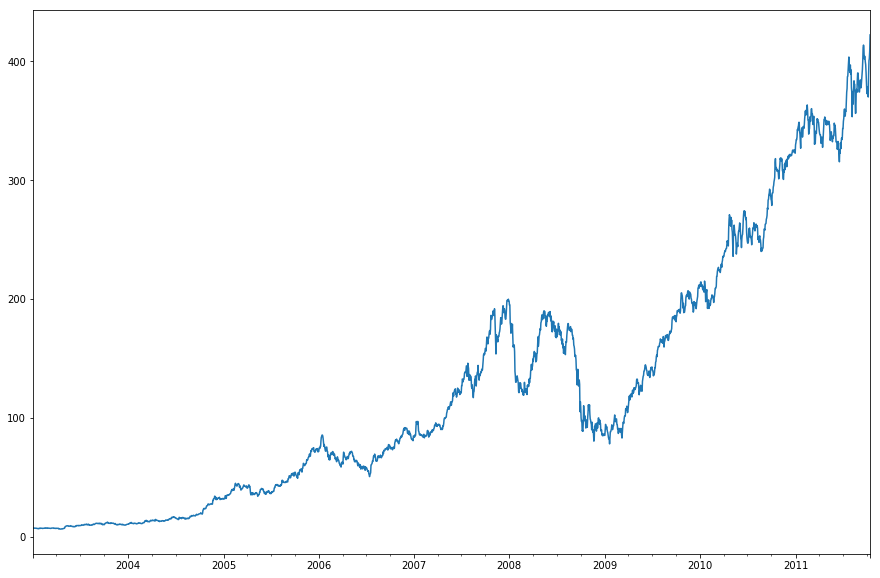

In [121]:
close_px['AAPL'].plot( figsize=(15,10) )

When called on a DataFrame, as you would expect, all of the time series are drawn on a single subplot with a legend indicating which is which:

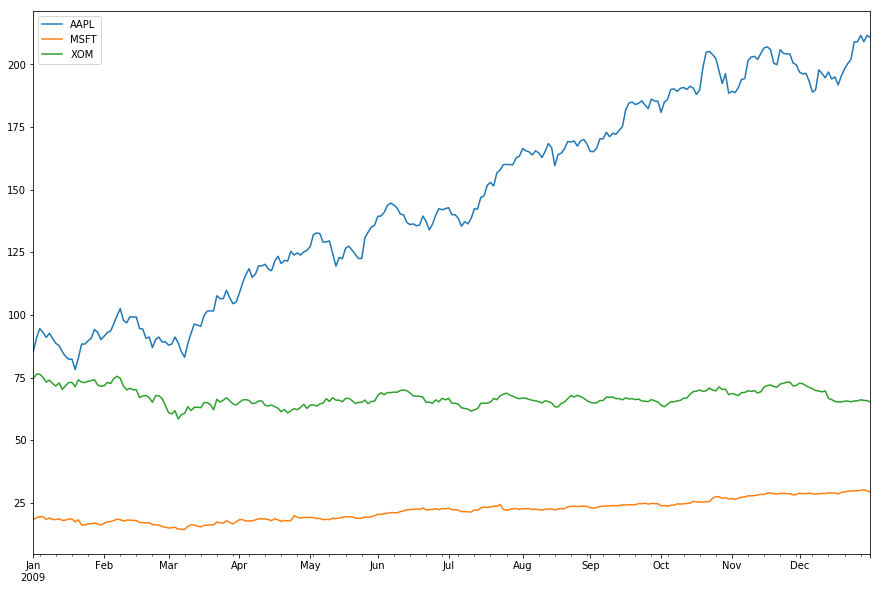

In [122]:
close_px.loc['2009'].plot( figsize=(15,10) )

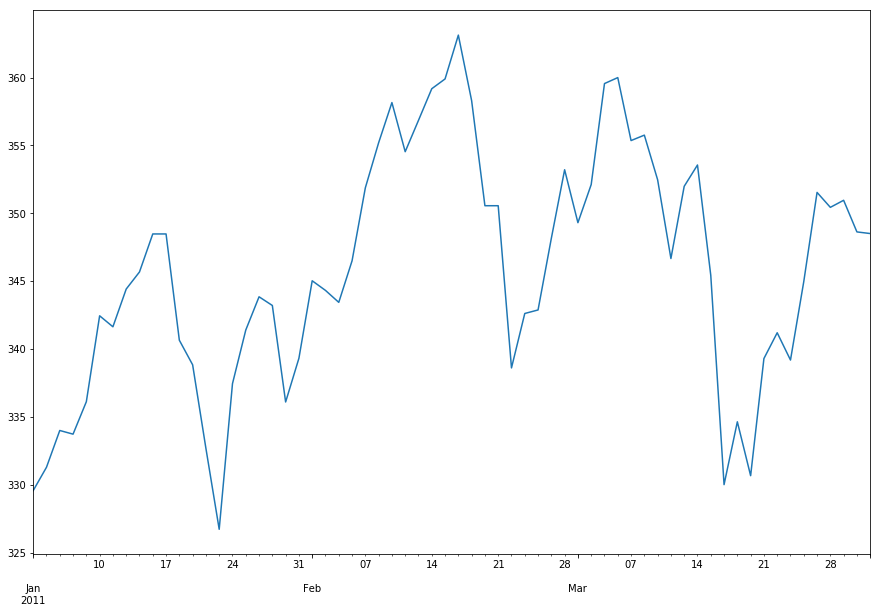

In [123]:
close_px['AAPL'].loc['01-2011':'03-2011'].plot( figsize=(15,10) )

The time axis automatically adapts its ticks and labels to the time range to draw. Quarterly data can be conveniently represented:

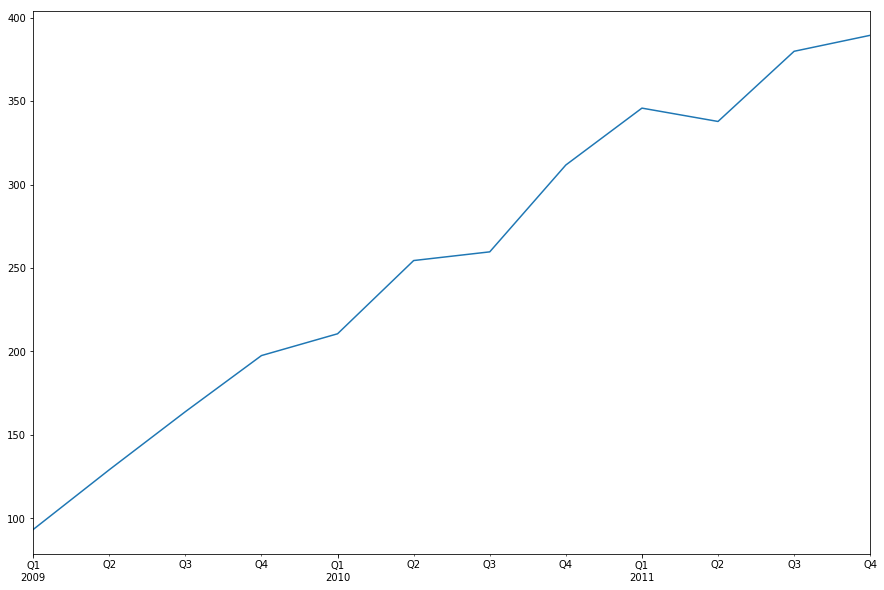

In [124]:
appl_q = close_px['AAPL'].resample('Q-DEC').mean()
appl_q.loc['2009':].plot( figsize=(15,10) )

When using interactive plots, changing zoom automatically modifies the time axis labels (uncomment and execute to test):

In [125]:
#%matplotlib
#close_px['AAPL'].plot( figsize=(15,10) )
#%matplotlib inline

## Moving window functions

A common class of array transformations intended for time series operations are statistics and other functions evaluated over a sliding window or with exponentially decaying weights. Like other statistical functions, these also automatically exclude missing data. The rolling() method generates a Rolling object, similar to GroupBy. On this object we can apply aggregation functions as with GroupBy objects:

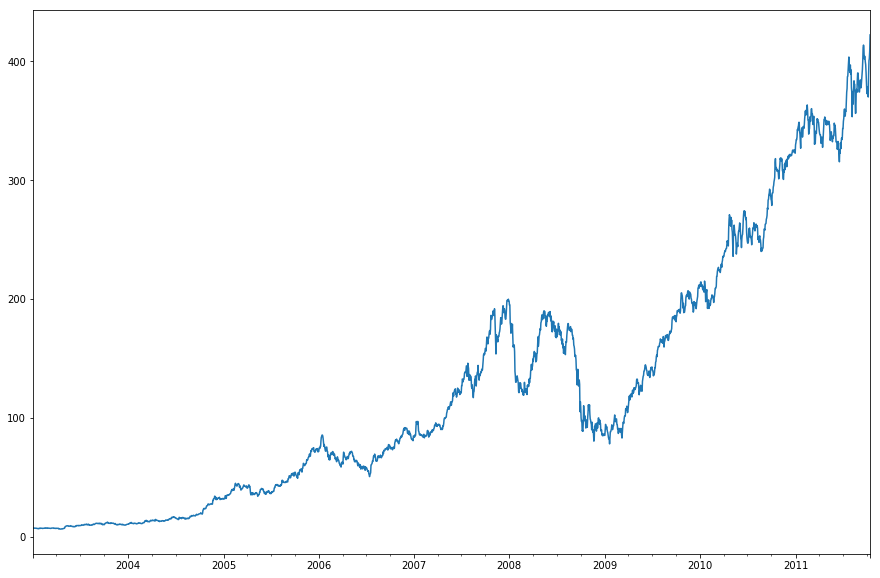

In [126]:
close_px = close_px.asfreq('B')
close_px.AAPL.plot( figsize=(15,10) )

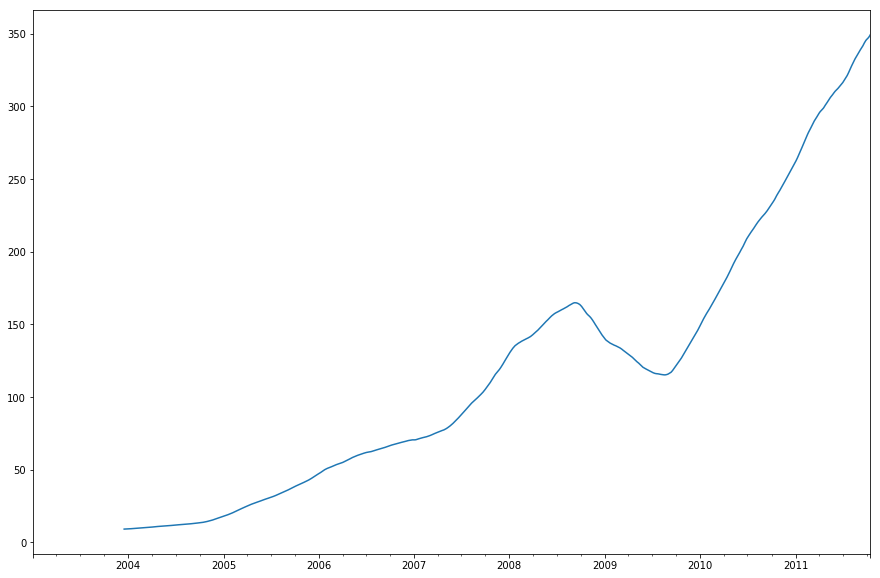

In [127]:
close_px.AAPL.rolling( window=250, center=False ).mean().plot( figsize=(15,10) )

By default, rolling() requires the indicated number of non-NA observations. This behavior can be changed to account for missing data and, in particular, the fact that you will have fewer than window periods of data at the beginning of the time series:

In [128]:
appl_std250 = close_px.AAPL.rolling(window=250, min_periods=10).std()
appl_std250[5:12] # Starts computing as soon as there are 10 available data points

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

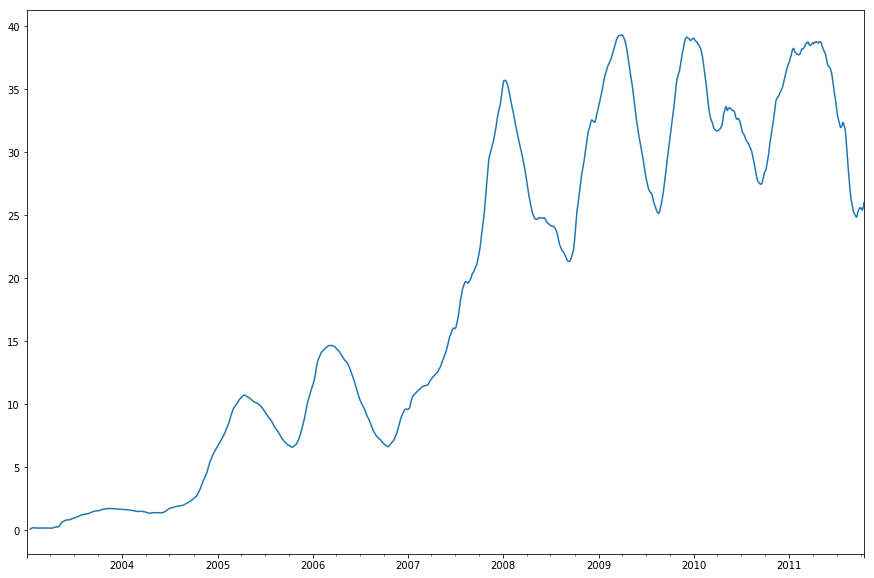

In [129]:
appl_std250.plot( figsize=(15,10) )

We can compute the cumulative mean of the time series by using rolling() with a window length equal to the Series length, and $min\_periods = 1$:

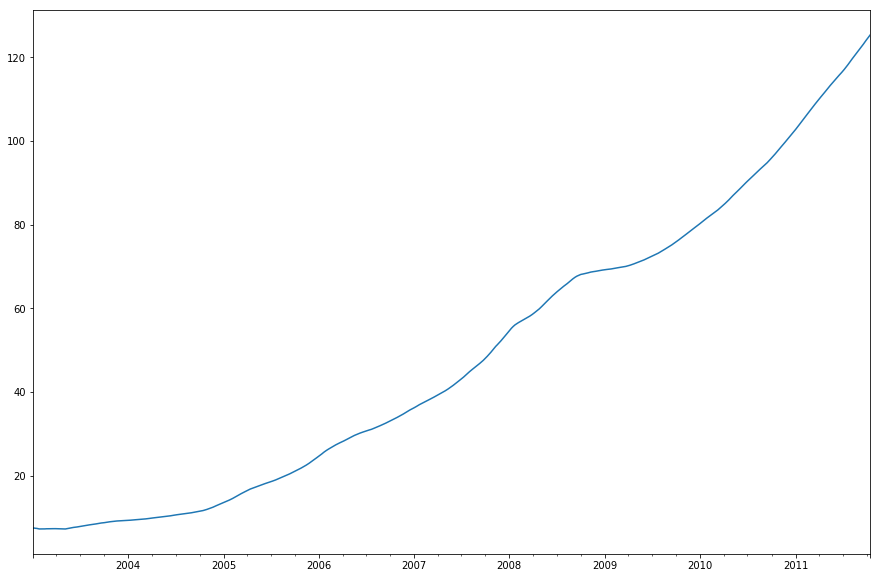

In [130]:
close_px.AAPL.rolling( window=len(close_px.AAPL), min_periods=1 ).mean().plot( figsize=(15,10) )

When called on a DataFrame, the moving window is applied to each column independently:

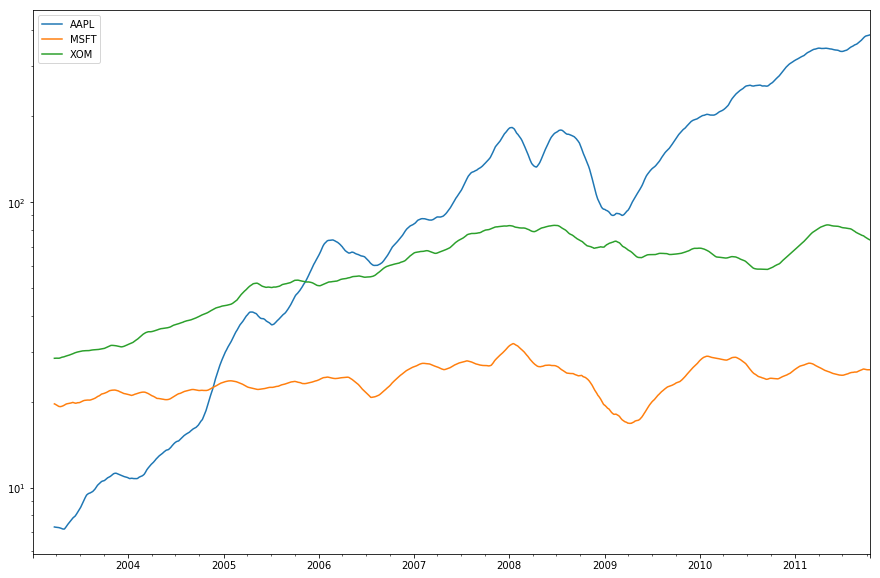

In [131]:
close_px.rolling( window=60 ).mean().plot(logy=True, figsize=(15,10) )